# Part-1
Part 1: Theory

a) What is the role of a confusion matrix in the evaluation of a machine trained for a pattern recognition task? In your answer, refer to a concrete example, either from literature or one you created. Anchor you answer in relevant literature.


b) What is the role of the ROC curve? How would you use it to compare the performance of several classifiers? In your answer, refer to concrete examples of classifiers, either from literature or one you created. Illustrate the ROC curves and anchor your answer in relevant literature.

# Rubric: ( Part-1 )
a) Explained the role of a confusion matrix in evaluating ML, referring to a concrete example that clearly illustrates the benefits of using the matrix, discussing both theoretical and practical evaluation metrics, anchored in literature.

b)  Explained the role of the ROC curve, referring to a concrete example that clearly illustrates the benefits of using the curve, discussing both theoretical and practical evaluation metrics, anchored in literature.


# PART-2 

Part 2: Application

You are tasked to build an image classifier for the MNIST dataset of handwritten numbers, implementing the k-nearest neighbors (k-NN) algorithm. You will need the following:

The MNIST dataset, available on multiple servers on the Internet. For example:
http://yann.lecun.com/exdb/mnist/
http://www.pymvpa.org/datadb/mnist.html
The Python package neighbors.KNeighborsClassifier:  https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
The input to your classifier program is an image containing a digit, 0-9. Your program must correctly identify the digit with an accuracy of 95%. Here the outline of your task, but you will have to do a bit of research on your own (and increasingly so throughout the program) to fill in the details:

Familiarize yourself with the MNIST dataset

Familiarize yourself with the k-NN algorithm and its Python implementation in sklearn

Create a Jupyter notebook for this assignment and implement the k-NN algorithm:

Import the package kNeighborsClassifier.
Be mindful of the train-test split and set the parameters accordingly (justify your choice).
Identify the variables in the dataset and define the Euclidean distance between an element in the test set and the training set.
Calculate the distance between the test element and each of if its k nearest neighbors.
Count the occurrence of each digit within the k nearest neighbors and identify the most popular digit.
Identify the test element as the digit voted as most popular in the set of the k nearest neighbors.
Classify the test element accordingly (i.e. based on the popular vote).
Calculate the error.
Review the article “Handwritten Digit Recognition Using K-Nearest Neighbour Classifier.” Note the algorithms used, but focus on the way the authors:

Present the findings
Discuss the findings
Calculate the accuracy of the results
Write the article, using professional terminology and content organization
Write a technical report (i.e., not a full-fledged academic paper) to accompany the Jupyter notebook that implements the classifier, using the aforementioned article as a guide on what to address and how to present the mini-project and report the findings.

Address the potential role of a confusion matrix in your report (refer to Part 1).

Address the potential role of ROC curve in your report (refer to Part 1).


# Rubric (Part-2)
a) The theoretical foundation is discussed in detail, establishing a clear connection to established literature.

b) k-NN algorithm implemented correctly, with clear explanations and demonstrably based on relevant theory.

c) Classifier correctly identifies digits 95% of the time even when the handwriting is challenging.

d) Explained the role of a confusion matrix in evaluating ML, referring to the k-NN implementation in the technical report that clearly illustrates the benefits of using the matrix, discussing both theoretical and practical evaluation metrics, anchored in literature.


e) Explained the role of the ROC curve, referring to the k-NN implementation in the technical report that clearly illustrates the benefits of using the curve, discussing both theoretical and practical evaluation metrics, anchored in literature.



# Rubric (Submission and Presentation)

a) All code files submitted and well commented and well organized.

b) README includes all files and detailed instructions, including troubleshooting directions.

c) Document is exceptionally well and professionally written, well referenced, and complies with APA style.

d) Mathematical formalism and rigor are evident throughout, clearly anchored in established in theoretical concepts.





In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
from scipy.stats import shapiro     #normality test
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from scipy.spatial import distance
from sklearn.decomposition import PCA
from yellowbrick.regressor import ResidualsPlot 
from mpl_toolkits.mplot3d import Axes3D   #plot 3D
from hdbscan import HDBSCAN
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn import metrics
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import h5py
from collections import Counter
import time
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

In [3]:
# Importing the dataset
image_trn= pd.read_csv("/Users/vikashbhagat/DSC-540/mnist_train.csv")

image_tst=pd.read_csv("/Users/vikashbhagat/DSC-540/mnist_test.csv")
    
    


In [4]:

print(" shape of train is ", image_trn.shape)
print("Shape of test is ", image_tst.shape)

 shape of train is  (60000, 785)
Shape of test is  (10000, 785)


In [5]:

Y_train=np.array(image_trn.iloc[:,0]) # Getting the target  from the image_trn

X_train=np.array(image_trn.iloc[:,1:]) # Getting the predictors from the image_trn



Y_test=np.array(image_tst.iloc[:,0])

X_test=np.array(image_tst.iloc[:,1:])

In [ ]:
Y_train # Train target data

In [ ]:
X_train # Test target data

In [6]:
# The below function names Show_imag which would plot the digit data.

size_img = 28
threshold_color = 100 / 255

def show_imag(x):
    plt.figure(figsize=(8,7))
    if x.shape[0]>100 :
        print(x.shape[0])
        n_imgs = 16
        n_samples = x.shape[0]
        x = x.reshape(n_samples, size_img, size_img)
        for i in range(16):
            plt.subplot(4, 4, i+1) #devide figure into 4x4 and choose i+1 to draw
            plt.imshow(x[i])
        plt.show()
    else:
        plt.imshow(x)
        plt.show()


In [ ]:
show_imag(X_train) # to plot the train data 

In [ ]:
show_imag(X_test) # to plot the Test data

In [7]:
# Feature selection

def get_pca(x_train, x_test):
    pca = PCA(n_components=0.95)
    pca.fit(x_train)
    x_train = pca.transform(x_train)
    x_test = pca.transform(x_test)
    print(x_train.shape, x_test.shape)
    return x_train, x_test

In [ ]:
get_pca(X_train, X_test)


In [ ]:
pca = PCA(.95)
pca.fit(X_train)

In [8]:

 #Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
   
  # Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# apply PCA to the data
from sklearn.decomposition import PCA
pca = PCA(.95)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


# KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7,n_jobs=-1)
#,n_jobs=-1
# Traning the model.
knn.fit(X_train,Y_train)

# Making Prediction
y_pred = knn.predict(X_test)


In [9]:
print(confusion_matrix(Y_test,y_pred))


[[ 965    1    0    3    1    5    4    1    0    0]
 [   0 1127    3    0    0    0    5    0    0    0]
 [  12    8  962   16    3    0    8    9   12    2]
 [   0    1    5  968    1   10    1   11   11    2]
 [   1    8    4    2  924    3    7    4    2   27]
 [   4    0    4   23    7  832   11    2    4    5]
 [   9    4    1    0    2    6  934    0    2    0]
 [   0   21    9    4    5    3    0  954    1   31]
 [  11    3    7   16    7   32    3    6  883    6]
 [   7    5    5   12   12    4    0   28    3  933]]


In [82]:

?plot_confusion_matrix

In [10]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.96      0.99      0.97      1135
           2       0.96      0.93      0.95      1032
           3       0.93      0.96      0.94      1010
           4       0.96      0.94      0.95       982
           5       0.93      0.93      0.93       892
           6       0.96      0.97      0.97       958
           7       0.94      0.93      0.93      1028
           8       0.96      0.91      0.93       974
           9       0.93      0.92      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [11]:
metrics.accuracy_score(Y_test, y_pred)

0.9482

In [ ]:
error_rate = []
# Might take some time
for i in range(7,8):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

In [ ]:
print(error_rate)

# Lets do an ROC Curve and analysis

In [27]:
y_scores = knn.predict_proba(X_test) # Created the probability score for Test data


In [28]:
y_scores[:,1].astype(int) # Converted the score into integer


array([0, 0, 1, ..., 0, 0, 0])

In [90]:
print(Y_test.shape)
print(y_scores[:,1].shape)
print(y_pred)
print(Y_test)

(10000,)
(10000,)
[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [125]:
## Creating the for loop to generate roc_curve function for all digits
fpr = dict()
tpr = dict()
thresh=dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test,y_scores[:,i] ,pos_label=i)
    


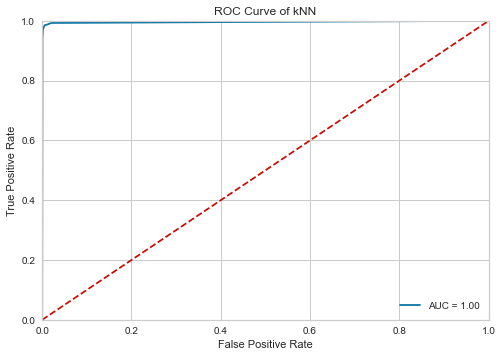

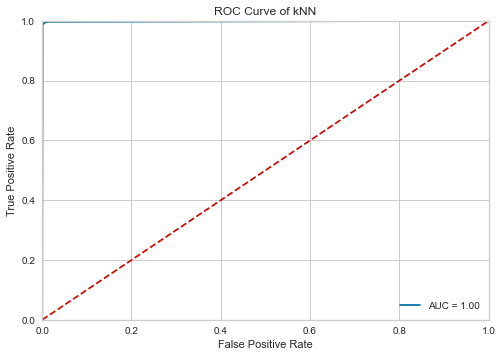

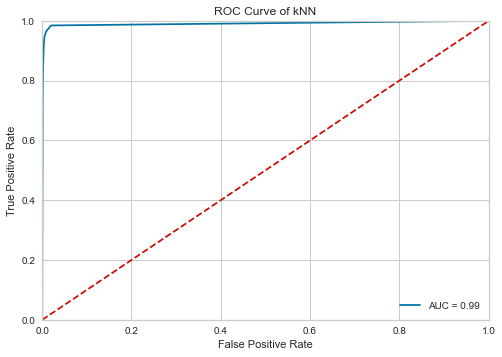

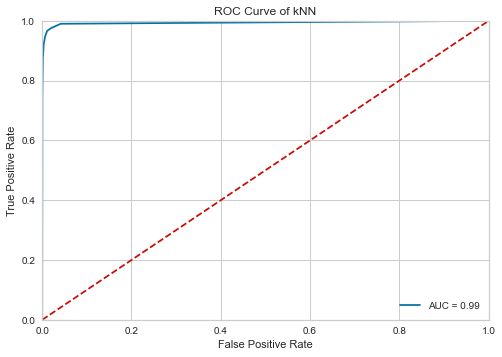

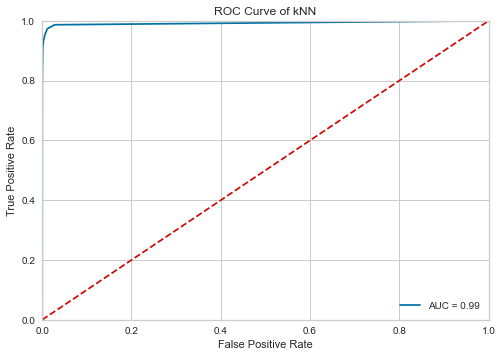

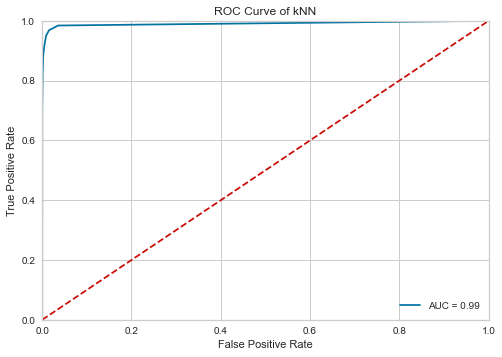

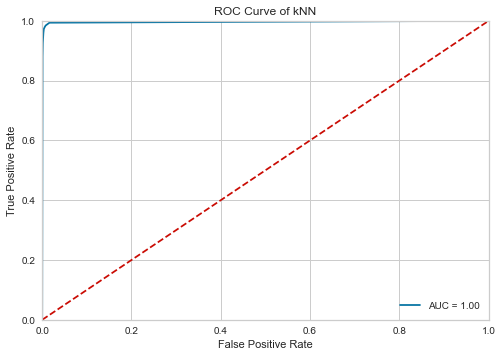

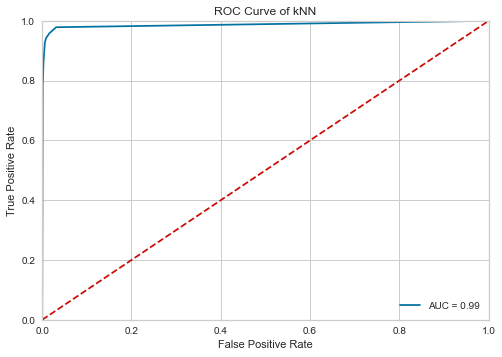

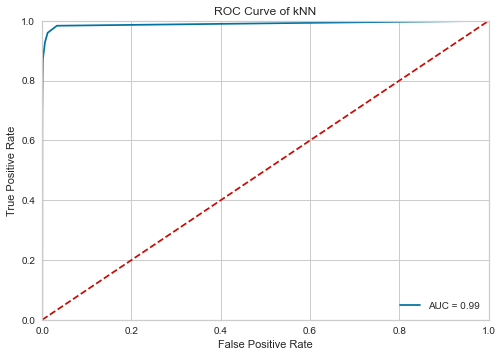

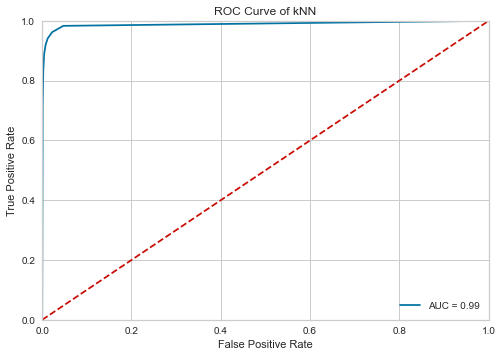

IndexError: index 10 is out of bounds for axis 1 with size 10

In [134]:
fpr = dict()
tpr = dict()
thresh=dict()
roc_auc = dict()
for i in range(11):
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test,y_scores[:,i] ,pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr[i], tpr[i], 'b', label = 'AUC = %0.2f' % roc_auc[i])
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve of kNN')
    plt.show()

In [ ]:
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()


In [16]:
?roc_auc_score

In [107]:
?dict

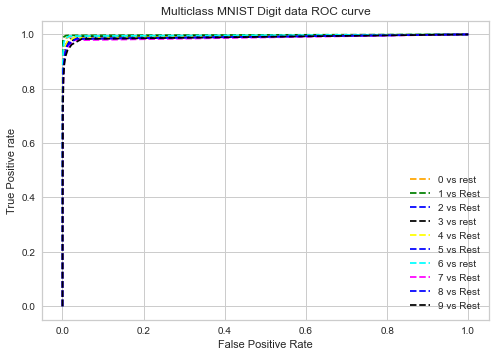

In [135]:
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='0 vs rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='black', label='3 vs rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='yellow', label='4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='blue', label='5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='cyan', label='6 vs rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='magenta', label='7 vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='blue', label='8 vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='black', label='9 vs Rest')

plt.title('Multiclass MNIST Digit data ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [129]:
?plt.plot